2A

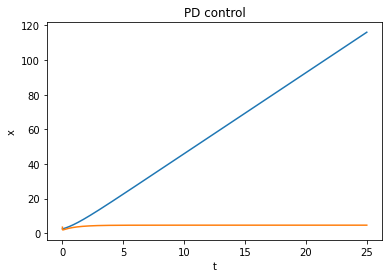

In [0]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint

time = np.linspace(0, 25, 10000) #defining in which bounds to plot
kp = 100 #proportional control coefficient
kd = 100 #derivative control coefficient
k = 7     #given constant
mu = 25   #given constant
init = [2.5, 3.5] #you can write here any initial conditions

def ref(t):  #desired reference state
  return 5.0 * t #function of desired reference state
def dref(t): #rate of change of desired reference state
  return 5.0 #derivative of previous function
def no_control(x, t): #model without any control
  y = x[0] 
  dy = x[1]
  xdot = [[], []]
  xdot[0] = dy
  xdot[1] = -mu * dy - k * y
  return xdot  
def pd_control(x, t): #model with PD control
  err = ref(t) - x[0] #error
  derr = dref(t) - x[1] #rate of change of error
  u = kd * derr + kp * err 
  y = x[0]
  dy = x[1]
  xdot = [[], []]
  xdot[0] = dy
  xdot[1] = u - mu * dy - k * y
  return xdot
'''
plt.subplot(111) #positioning the plotted graph
plt.title("no control") #title of graph
plt.xlabel("t")   #what means x-axis (time)
plt.ylabel("x")   #what means y-axis (x)
plt.plot(time, odeint(no_control, init, time)) #plotting ODE solution for model without control
'''
plt.subplot(111)
plt.title("PD control")
plt.xlabel("t") 
plt.ylabel("x")
plt.plot(time, odeint(pd_control, init, time)) #plotting ODE solution for model with PD control


2B

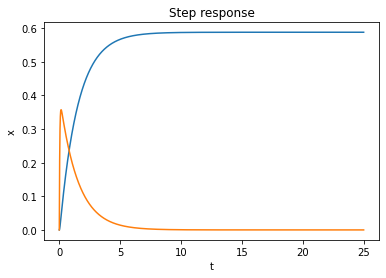

In [95]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint

time = np.linspace(0, 25, 10000) #defining in which bounds to plot
kp = 100 #proportional control coefficient
kd = 100 #derivative control coefficient
k = 7     #given constant
mu = 25   #given constant
init = [0, 0] #zero initial conditions

def ref(t):  #desired reference state (step function)
  if t == 0:
    return 0.5
  elif t < 0:
    return 0
  else: 
    return 1
def dref(t): #rate of change of desired reference state
  return 0   #derivative of previous function
def step(x, t): #function for defining ODE for step response
  err = ref(t) - x[0] #error
  derr = dref(t) - x[1] #rate of change of error
  u = kd * derr + kp * err #control
  y = x[0]
  dy = x[1]
  xdot = [[], []]
  xdot[0] = dy
  xdot[1] = u - mu * dy - k * y
  return xdot
plt.subplot(111)
plt.title("Step response")
plt.xlabel("t") 
plt.ylabel("x")
plt.plot(time, odeint(step, init, time)) #solving ODE and plotting step response

2E

'\nplt.subplot(111)\nplt.title("PI control")\nplt.xlabel("t") \nplt.ylabel("x")\nplt.plot(time, odeint(pi_control, init, time)) #plotting ODE solution for model with PI control\n'

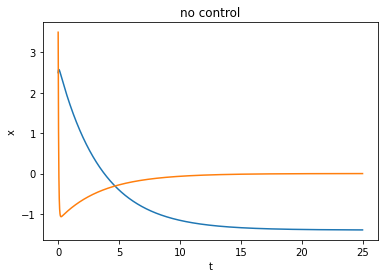

In [121]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
from scipy.integrate import odeint

time = np.linspace(0, 25, 10000) #defining in which bounds to plot
kp = 1000 #proportional control coefficient
ki = 1 #integral control coefficient
k = 7     #given constant
mu = 25   #given constant
init = [2.5, 3.5] #you can write here any initial conditions

def ref(t):  #desired reference state
  return 5.0*t #function of desired reference state
def no_control(x, t): #model without any control
  y = x[0] 
  dy = x[1]
  xdot = [[], []]
  xdot[0] = dy
  xdot[1] = -mu * dy - k * y - 9.8
  return xdot  
def pi_control(x, t): #model with PD control
  err = ref(t) - x[0] #error
  diff = lambda t: ref(t) - x[0]
  ierr = integrate.quad(diff, 0, t)[0] #integral of error
  u = ki * ierr + kp * err #control
  y = x[0]
  dy = x[1]
  xdot = [[], []]
  xdot[0] = dy
  xdot[1] = u - mu * dy - k * y - 9.8
  return xdot

plt.subplot(111) #positioning the plotted graph
plt.title("no control") #title of graph
plt.xlabel("t")   #what means x-axis (time)
plt.ylabel("x")   #what means y-axis (x)
plt.plot(time, odeint(no_control, init, time)) #plotting ODE solution for model without control
'''
plt.subplot(111)
plt.title("PI control")
plt.xlabel("t") 
plt.ylabel("x")
plt.plot(time, odeint(pi_control, init, time)) #plotting ODE solution for model with PI control
'''